---
title: Python 解码 base64 格式图片
tags: 小书匠,python,base64,image,picture,decode,图片
grammar_cjkRuby: true
renderNumberedHeading: true
---

[toc]

# Python 解码 base64 格式图片

我在做火车票抢票器的时候遇到一个问题，就是验证码提取的；一般验证码都是一些http请求的url，但是火车票网站遇到了我没有见过的以data:image/jpg;base64开头的字符串.现在我们就用Python实现base64编码转成图片。

假设我们获取的base64编码是：data:image/jpg;base64,/abcdefgh123456oK

我们一定要去掉data:image/jpg:base64

In [3]:
import os, base64

img_str = "iVBORw0KGgoAAAANSUhEUgAABGgAAABUCAYAAADefQH1AAAgAElEQVR4Ae2d2cs8R9WA/VfEW68+vPFK8ELwQgQRQUFEkWBQFCUqBsUEFWOCJsZdE3FPjESD4hqjQYxL3OKC8eeC+xr3XaOOPJPvjOett6qnp2d6pnvmKXjpebura3lqO3XqVPX9FjoJSEACEpCABCQgAQlIQAISkIAEJCCBgxK430FjN3IJSEACEpCABCQgAQlIQAISkIAEJCCBhQoaK4EEJCABCUhAAhKQgAQkIAEJSEACEjgwARU0By4Ao5eABCQgAQlIQAISkIAEJCABCUhAAiporAMSkIAEJCABCUhAAhKQgAQkIAEJSODABFTQHLgAjF4CEpCABCQgAQlIQAISkIAEJCABCaigsQ5IQAISkIAEJCABCUhAAhKQgAQkIIEDE1BBc+ACMHoJSEACEpCABCQgAQlIQAISkIAEJKCCxjogAQlIQAISkIAEJCABCUhAAhKQgAQOTEAFzYELwOglIAEJSEACEpCABCQgAQlIQAISkIAKmhOpA/f83wMW/k2HwYlUO7MpAQlIQAISkIAEJCABCUhAAj0JqKDpCWru3lTOTEc5Q1noJCABCUhAAhKQgAQkIAEJSEACmYAKmkzjiH+roFFBc8TV26xJQAISkIAEJCABCUhAAhKYPQEVNLMvwn4ZUEGjgqZfTdGXBCQgAQlIQAISkIAEJCABCRyCgAqaQ1A/QJwqaFTQHKDaGaUEJCABCUhAAhKQwMgE5irnj4zF4CUwSwIqaGZZbJsneq4d97Gme/MS9A0JSEACEpCABCQgAQmcJzBXefl8TrwjAQmooDmROtDquE8k+wfLptwPht6IJSABCUhAAhKQwEkQaMmbU79/EoVjJiWwIQEVNBsCm6v3Vgc91/zMJd1yn0tJmU4JSEACEpCABCQwTwIteXPq9+dJ21RLYFwCKmjG5TuZ0Fsd9GQSeKQJkfuRFqzZkoAEJCABCUhAAhMh0JI3p35/IvhMhgQmRUAFzaSKY7zEtDro8WI0ZAjI3XogAQlIQAISkIAEJDAmgZa8OfX7YzIxbAnMlYAKmrmW3IbpbnXQGwaj9w0JyH1DYHqXgAQkIAEJSEACEtiIwNTlzamnbyPYepbAyARU0IwMeCrB2zEepiTkfhjuxioBCUhAAhKQgAROhcDU5c2pp+9U6on5nAcBFTTzKKetU2nHuDXCQQGs4/6nP/1p8eEPf3jxtre9bXH11VcvXvaylw2Kx5ckMCUCH/nIR5Z1+frrr1+8//3vX9x9991TSp5pkYAEJDAKAcf0UbCefKB//vOfFy996UsXr3zlKxc33njj4hOf+MTiL3/5yxku6+TNM54P8M/U03cAJEYpgSaBySho/v73vy9+//vfL//4fWj317/+ddn5/fOf/zx0UnYSvx3jTjBuHEgXdyau97///c/9bRzJjF/497//vWxnCBqlsDHjbJ180l/wghecq9cXX3zxgvLWSUACEjhGAo7p25fqf/7zn5VM8K9//Wv7ADcIgfhCFmEOMCX3i1/84tyY+sAHPnDx2c9+dpXMLnlz5emAP6aaPuaclPvf/va3A9IZP2rqd8yzlbfH571tDJNR0GA5EJPVQ1sRMImItDz/+c/vxfi6665bvfOzn/2s1zv79DTVjnGfDA4RV4s7qyEMrlHPHvvYxy5e9KIXLVdHDpHOTeN88pOfvEz7Qx7ykE1fXTBIvPOd71w8/OEPX+U/OPz4xz/eOLzaCxcuXFh86Utf2vjvq1/9ai04721IgNU9+vFnPetZZ8r4Ax/4QGdIP/3pT1dlNjUBuTPhPpTAngkwkY0+7nvf+96eYze6ksDcx/QyP4f6nzod8gAKrz5uG3nkj3/849IyBVkm4uX64Ac/uE/Ue/PDhPqaa65ZXHbZZYtHPvKRq7Q+9KEPXcpUJKQlb37rW99a9hVf+cpX9pbeWkSt9NX8bnrvrrvuWuYR2W9T9/jHP37Js688i5wYdaVvHd00TWP4Ry6LdD/iEY8YIwrD3CGByShorrjiilXFmaOC5g1veMMq/buaZO6wnJsd9y7jMKzzBFoD0pe//OVVfXnhC194/sXizte//vXFTTfdtLj55psX3/72t4un+//3iU984jL9Q4SYrIyNwSKuP/rRj3aSmUc96lErvhF23+tOEjDzQFhlue2225Zb726//fatrJuyMINlTZd73/vetyo3tkfpJCCBOgEU3TGpRNmvQrPOaV935z6m74vTuni++MUvrsaAvpPfofIIi7EtWWGIbLMub8g35Okd73jHgnzShoe6UEoh12Bdg2vJm8997nNXTJElD+Va6ds2PeQp5LtLL7104+A2VdDkto7MMhengmYuJXVfOlXQVMpriAWNCpoKSG81B8w8Ef3Yxz7WJMWqydOf/vTV4BODEJZd9957b/O9sR8MFYh++9vfrvLyoAc9aIHlGYMrSif+thFYcp5bQlfw67rmcE7xNwqZbN0FK4RVVjaHuuD9pCc9qTMItpQSF/6pH//4xz86/ftQAqdM4N3vfveqP2XSpzscgbmP6YcjdzbmfSpoPvnJT67aDzLDe97zngXWJsgiP/jBD84mbMv/Xve6163iivHwMY95zOLnP//5oJDf+ta3rsILy9+WAuQ73/nOyu/Tnva0QfHt4qVW+rYNO8vIQ6wJVdBsWwK+PwYBFTQVqkMUNGiww9z4kBPnSnaWt8bqGFvxef8+Ai3uWMPEIH3nnXc2cV1++eUrf5i1YpYY71177bXN98Z+8N3vfndZ37/xjW9sFFVeeeCwu7HcD3/4w+XBtBxOm/9i8g9DhJr8jN9TsE4ai0mfcLH+i/qFkuaiiy468/9vfvObPsGc8xPcEYLXOQ7MjjQgMOskIIE6Ac5MQJFJe6GN7UrBXY/Nu10E5j6md+Vtn8+GKGiGyiOvf/3rV2PNZz7zmdGyyaH5MabRTp/whCes/n/c4x436Gw2LHEizE9/+tPLtLfkTR4+5SlPWfn//ve/P1peuwLuSl/Xe13PUKQFh6c+9aldXpvPNlXQsHAa8z0WHefitKCZS0ndl04VNJXyGqKgqQQzqVtjdIyTyuBEE9PinoW5lmUCwncMPNmMMk9gqatzch/84AdXeQqhYp/pf9jDHraK/1gOAN8lP5Rm1Dk4xSFy7NEPBctb3vKWQdHFVow+ChriDQuevL9+UMS+JIEjJ/DGN75x1af13RJy5EgOkr1THdN3DXuIgmZoGtheHjLWmFsEsZQhHrbfhBKVxa2Ie9OFLvK7qYKG82civr5naw7l2nqvJQ+3/Pe5T14iX2FJ1Oe97GdTBU1+d06/VdDMqbQWi6NX0KApvvLKK5fnKZRFg9ULGnQ0y1gmcD4Cmu4+ChomEW9+85urfzGxKeMjLa961auWf1/72tfKx2f+Z+UYv5hFhuPsDkya+Yzjpq7VMcbe1T7hcS5FTj/pQHHA/lYOfIUjE7gYgPqEeex+Wtz7CHOsCsXAk62yECTi/q7ObFlXDpiN1ur7OguHXGeoO3kV59nPfvaqPkW9GlK316U9Px+ioKE+v/rVr16mNZRKWAJR71E40HewcsPn0nPdZzBk62NLqYHig+f8dQkWlDf1BWHy0Y9+9DJOfiOgcVDoLt0znvGMZd3K/Q7hh+KGPA9xmyhoCJ/6EHW8awtgLS34530mrjjY8j8rlZQX7LCW0kmA9vqa17xmWT/W9WX0gdFP0f6z4ysg9A18BherM/oE6hoTMhTqrXPpPv/5z6/CxOqvy73rXe9a+i3b5h/+8IeVQpNxeJM+IffPyCSO6V0l0P1sbmM6uRkytnzzm99c1dlf//rXi5/85CfLOs7YTv275JJLFh//+Me7YS0Wy63NL3/5y5f9MuPaVVddteCg1z4KmqHySE47bTl/qACL5GjfXGm3u3Kx4ED+sgvFTV6Ay8+7fm+qoCEsPkYR4+ohZP+WPBz5ZEszi3jIhn3cL3/5y1V+GN+7HGHzcQrCptyRdehTaQN9FDSMDzUZuLWlijEh6hOyYZfjS1zhN8rlve997/IeH07YlVNBsyuS+wnnKBU0WB7QeeXOiIaYHedehGlwdFhx5aT0+N3SNDMohZ/y2hLG+LpT+O0yxUPgCn904OGiM+cZgl/Z2Ye/2rXVMaK86uvoiCJdCIk5PXGfK+abeaLaN/xj9NfiTkcfzFoWNHTU4ScL73nlhUn+Ptwtt9yySkukiSuWFV0u15n8Xuv32AqnIQoaFK6RXr609dGPfnT1f9yPK3vawz3zmc9c+Yt7+ZpNc1HS1BxljRVJhF9eOSjwd7/7Xe3VQffi89jPec5zzrwfirWhB7iHgoa89HH5rCK29m3iMncmCiWz+D+UbZuErd/jI4AiJeoEE86Wi7aBXyaR2YWFWYRTXpmgceh26aiD4fclL3lJ+Xj1P+dUhD8mE6VjchvPOUOqr8v9s2N6X2p1f3Mb04eOLfncIybTLTkaxWfLMfmM+lpekUnjHnJ8zQ2VR3LaI47WdZ1sU0tX616Mf+Q7HBP4UNxkuSGer7vyRcRIOwvLuJa8GWF96lOfWr1zCNm/lT4WI5EtggfXPi73e13jOVuzUQIGr3xlvhLPKKeWa/XxLeUaivIod/LTNSeK+EkXX4PDxaIY9zi779Zbb9363EkVNK3Sneb9o1LQcH4EQk408twIc0fPqlF+hiIH7Xk+6TyetxQ0hIH/+Mua+JaChiqQlUatyTUNPuJnQAlHI437cWXCyeGApKfLtTpGwkEh1MdlYS7ip2Oho2dCF/e4brrq3Sf+Ofppcc8n8HeZt8bkHM500AhEcQ5NOXENxSSKs9e+9rU7xYV5bNR1riGUrRNimGij1Ii/WKmgjjDpj/txXVePt83Utgoa0h/9C3m/+OKLl/mIwTsLWllRUEv3OgUNq325TbFCRD/1ile84szKX23CVouvz70PfehDqzgREFAe5q9uIeBlF30u+e+yfsqT4FghyuHUfr/4xS9epeVzn/tczUv1XuYOP8qLOks+cj/N702sDaqReXP2BPgyXrQzDt6sOVZZo93TJ5f1JvpDBHJWaJmcYp1bfma+VJ4gtEffQfitbZcocCONjAGlyyvJyBh9nWN6X1Lr/c1pTN9mbKkpOVhwZFyKjwdEXaVelo6zXuI5VywZsFDN553F8yy353CGyiNYvoWswTXkK+LL9/m9yzP+YisVbf2GG25YwADZIfKZz3bDgp/nHHwLz5bLyl3Cx7XkzQiDfiuPgfuW/VvpCw5xhdM6ly0HkYnLPjm/nxeTKXPmLMgX0W9HvF0KGuSHkIFzPW8paIgfq5gIu6VAYlEy/CC7hOMDGnE/rqT36quvXuQF2/Df56qCpg+l6fiZjIIG4R4LE/66BP0SHYITDSRrIKMy08iZZJSVGeEp/Fx22WVnGjYTknjGtaWgKdORBaguBQ1mchE+qwA1lxt/Xh1HmKPjRgCMMPKV+6zs1Tqqro6xtXpfpq0U5jBPzXGxQhjpYbDVtQfM4MS1tSUOfvlQ3fwOv/naAC4myTGB4FmpvNl1WUQd7TOQ5rgRuCIf5Sp09jfW720VNJH2rDglrbTNG2+88czWmawoqOWnS0FDu8rKXMzns2MiF9uRSFOsoGU/Q34Tb1jLRF7jSv+Cy4rAeMaVwb/lMHsPv3kVseWf+5j2xjtdgmoZRuaOQAPncKxa5rGiSzka73g9bgLZQo7+oeZQikRdRHAuHRO6O+6448x4GH5yH15TpmZ5pLawQZuMiSR9PO2v5rKFT7kFq+afe47pLTKb3UcOjfrBdcpj+rZjS6mgyYsSUGObX7Cobe9loSGel8rG66+/fvUMPy0FTVk6Q+WRfH7JmOf5sfCErBT5ztfYWon13pve9KaV1UX4ueeee8rsLv/P8gNhk/6WnJ8DyH3ZvmX/Vvoir8wb6ANbiuqcj3z2VlmPsr8vfOELK+4sFOX5JQrE6FtJQ5eCJoeZ+/QuBQ3HWkTenve85+UgVr9zPsq2hGyPYqhUJBEmYwkLapt86RK/Mc/OSsFVYvwxKQKTUdBsSgXBGuVKnpRGQ2AigSKj1uEyOOV3wpwsx5877V0raOioI521T87SScdzJkoth/UNHXuebMR7dDiY2+bTxbs6Rhp/S+jL8WdhjndqHUOY9LUE3RzeKfzu4k55ocVf5+DOpBO2lC3WSnw2EeElrwwQHgMcE+Uuc8p18fV5PlQgOgYFDUJkH5cVBTX/WcAqBSUG6mjPsTpWhpHbI2a6u3LUHSwJqFu0cwRqhPILFy6cs1DkOatEDPpdrlyxZXWSeopCvOszo1kZTRh9XObOnvPSZdNwtqvpJJCVG2x/Ll30d7TJX/3qV+Xjtf/n90u5JG9fqi1s5MM9UQS1XO5PumSH/H7uQxzTM5nu38g+9F3Imchh2Sph6mP6tmNLVtDUPtmc63NZX5lwxrhWs/RCPg8ZEn/HoqChNmHxgYU/1h4oVGjrWIaGtUxw4YofOGdlQq1Gwj/eg2dL3szvMr4HY9r8PmR/FJa0k1b6mK9s0q+SZtJO3slLl7ybP8Fds8TN8gBh9XF9FTSExWIp6WTeyQJR6aLv4HlLMUX+aLe5vKPceQ8lDn257rgIzE5BgxASFT4qKFcUFXQA6zq0fLYBK9A1x8F9EfauFTTEl00bsxKFZ5g/RtzrDpaKtKOl5dyc6LDifa6Y5OFaHWP4ZfV/ncvCXItLmPnSaeja3OlouywOWuxq1jKUOybCXRPdVnhD78eE49QsaKjXrJb2cVlRUPOfJ1SlggYFRrRNVtWYDMQflkf8sTIUgtZY7Q1BqKUIRGDoEozKPHNuF+a5pDXyxhXT+JbLAn2rvy7fzdxriiMm4BE/20N1EuCA3KgT5aQyTzgZu9c5JmLUW+QIJgT8xbhIHLVFofy83BYS2yN4d93h1nkyghJ/nXNMX0eo/jyvjEe9mcuYvu3YkhU0LQVKMCnPWsQ6Ip4h69Zc3hbSCr98b6g8khdjS8VpGccu/29Zy9DWawriVtyMv1iPRP/RkvPL9zmTM8phbNkf2TTi6pu+Mr3l/6Q5wmzVo3gnrKaRk2tlnK3fxlDQ5K+ulueQ0UdHPjA46OOYMyK3xFEH8T5XFtVaFld9wtbPtAjMTkGDtjlXSPZ4M1j2dVjexPts0am5fABwSxFRvscEK8Lt2uLEe2xHCL9l55gtIvpOBCMtdNbsc8wToJi4tTrG8LtOC00cWZij0625vOJde35q91rcKX9Y9TmPozVJZpWUDp8VVgQZToKvCf9jMB8qEJHOqPtz3OJUW/Vr8c2KgpqfLgVNfjd4rbuWyt5anH3v1RSBKOPYjsFXkVDOIBj2XbVhZRRFU1Yi0/dgEdY69yPSykpj5L3crhp+8jWzqymQMvf40lN+39+nSSCvZOaVTupt1D/qfc0xViOI00bCb+taO2crH2adLfTo+2OMRiBf57LyMRZnut5xTO+i036G4pe+qyzvOYzpuX9s1dHyfh5bsoLmzjvvrEKKfh45ITv6+gi7PM8s/OUDgI9JQYNyoGYtw4Izi8soidmywsJdqaQNNuWVw3Wxng2mLXmzfI/+KvqVsWX/PKfpm74yvfl/xvS8MEUf2eWCDdubWi7a8RgKGiyDIg3lIlM+CJgFuE0dCvvybFJkN91xEJidgiZbt0Slp4OiI++j0EDAivfKVeso0rwnfQwFTRa68oSPQT/S1ke4ivRy5bwGvsIQHVeEQyeMa3WMvBN+GRy6XBbmWpMqFTRnCba4B/OuTwNSD8tDrxlIKDMUO0xW8+GrhIlg1JpEnE3Zdv+dqoKm/LpRF8UsCNf8ZUVB2RdlK0HaNJOBdX9ZiK7F1+ceCt4sUFGnsBpAmEYwKs8I4DlK8nWWi/mrHeSHiSRKmz4OwSXaS2u7Vw5nG+45HH+fFgG2w0U9y9artDvu07fWFH7IHWU/jH/66mizMRnifm3v/7333rtSXvJOONIRaVq3Uhzv5AnbOqtKx/SgNvyKxRTyWpTT1Mf0bceWrKBpneHVUtCwFSM4tc5Jyl8aOhYFDcrbLJvTH2AxwbZd5LwsNwcfDhnvcmyHyWGy4NySN2vh7Ev2Z44TedokfbU0cy9/yGAdI46CiLhLZWEOP/pvePZxm2xxIryQl0kL5Y3L2/kYK2rWPa20xBEXpaxG+CjtdMdBYHYKGrB3nT+DQgWBviX85wOj6KBqjolONOoxFDTEyYFREUcIUXnyw4GD6xwNnQGMw6IirLgi5LGvM4TBVseYz8Rhha7FjbQozK0rkfPPW9yjnLhGGZVvMwCHYI+pcEyS8cezWPEljLKjHruTjgGHgWUTR32NvM/Rgqbc/tCV93WKgtyeSgVNnmTVVty74t3mWZjjZkVghJcniwjg2cQWAbPLZSsY9nxv6nL9XmfCu457l2Js03Tp/3gI5LEwzofDWiz6K7bn1RxfzAs/1FMsGstxNG9TavX3bPWLcO66665lVHl1FEVAH5etjK+44orOV3If5KJLJ6rOh1hcRdlxbZXxFMb0bceWbRQ0+UDslsVA3gZ1LAqaONYARQCLFTFJp1KhqIm6w3Ycxt74ny/MtVzeDRCKhZa8WQsj93djyv7kFQshFIOt9PVdXKJfzXLHOtkIhXqwrB3QHlxiG1RwjPut66YKmmwVFgcaZ2tHjqhY58gL88Lyy4Dkj3kCys+x5f51afT5bgnMUkETCGj4dHa1g3JpaAhO5Xaj/Emz1mQrn3swloImC1EhGEXH01qpI99oWTErzQqe6IC4MlFCCVUKiK2OkTDzqkbrU3D4U5iLmtf/2uKeO9muPceUZc3cNVuCxRY/tjfFasWmFlj9c3SfTxU064nlVbGyPfI27TjabqmgoW+KZ7S7fTkmgfRNNUuBWHnlQNV4nrdm0Le2XFghkCdWfzZ1ub63JsoRpgqaIOF1UwK5zbJwcvnll6/aIYq9mgtFOUJyy5IsT4pbk/esOEShg5Vk9AHrFKBluqKt8n7+EmTpzzG9JDL8/7mM6duOLdsoaPjiTdTp1gHt+XyUY1HQMHGOr27mGpYtPOKrroytIZN3LYDlBZMYE1vyZo4z/454KJN9yP6t9BE/i5Bs78KasOVIY9Qf0t7HhcKr68MlsRA6loKGcSHSHQe4Z/Zd25LooynfsEqLcLgO+ZJTH2b6mQaBWStoMkIqOKfnR0PLlRiT0zDF5PT9eIZgVXP5oN6xFDR0wtHgEKbyoXN8prDmMMGOzibywJWO5+1vf/uiS5vc6hiJJwuCXVpmhblaqXTfa3HPh5y1VpK6QubzlZR9dPbhF+181Im4N8ZVBc16qmxPi3ZamyTlfqZU0NCe410E4kM7FEyRnlKYCOVL7RPBkW4EH96nrxviiD9WubomwoStgmYIYd+BQLaw5XyAkCe6tq2EHxaKao5JWPihDbQUNLxLPPjBfz4stXXWRy0+7jH5jfbKQlXLOaa3yGx+fy5j+rZjyzYKGs7Ji3rJ+FhznNMRfo5FQVPLJ/fCCob2Hose3GdRLhi0rEuyNfLtt9++jKIlb7bi37fs30pf5JUrLFrng0b/iD/S3sdl61sOZy5dPqh3LAUNceZ6TZnG/K81D+Vw+dh6lfnwHtaWfc7jK/Pq//MicDQKmsAeB6qGJUFUbLTy4bLZMObI2dFJhiUL746loCHOrEHts/qSOxrSdumlly7NqXP6W79bHWP4J5/BisPKak5hrkal+16L+0033bTiPURBE8IgdTW72FdMXRnTqaBZTzdvWSzPd6KfCYUD7a5U0OQvxzAgdx3+zGDPGVRju5hk5q+PYcUY97G8ablQ0CBwDHVZIM0HqZbhqaApifh/XwIoAkPhGOMh166JYm7HNWtHJhs5rC4FTSjYs3/aDunaxNG/RD5on63z+RzTN6Ha7XcuY/q2Y8s2Cpp8OC31shzXssJgXbvLpTFUHsly7yZngOS4t/mNZU209dwvIBPG/dYhuHk8DOuXlrzZlcbMYGzZv5U+tmKGHEG++V26vN2077yMMK677roVy9pHAbJF2ZgKGuSmKNM832vJMvkAYd5j3nrrrbd2WhiVzPx/3gSOTkGTiwPhAyUIjT0raPLWAiY/aCoxq+PrTZjZRSPiWusIEJYYSPJfVrbQueZnLcuW0J7n+BCqWo5JNxNyJuebbhNodYwRVxbU+FxkzWU/sS2r9JdNxMtnp/h/izt7cqPcOfh6U4e5bLxP3eN/BKcY5Ojcd+WwOsv1md+xrZD2Uz7L+6vLNGSh4tjPoMn7lLF8o99B2EIoy0piyrFU0MCNe1HGCA4M8NGX8GUAFCLR3jhvamxHv0B6mJCyQs85GfmzvpG2WjrC8m8bBQ2TzgiHeke9rDkVNDUq3utLICtWqe/0qS0FB2FGG8Qv8gPjP3WViXAW/qMt54lYmSbOMok+PPyvOwizDCP+z2NM63PyjulBa/tr5j31MX2bsWUbBQ2U82eXkSOog7QX5OFQKkbdrylGdymPZOXEIRQ05DvaO5/Kpu9gnI9F4q6FtnyuyTYKmtwHjC37t+Rh6gV9HwpqrPhhUro8NyPNfV1pwYgiFcUgVs2xoBn1raWgYREsy7nZQpHxIj+rKelJaz5/KuLjyjhRc8jwyDnXXnvtXhbgamnw3mEJHLWCJtDSoZd7w7NQlRsLv2MSwO+agiZ/bal8t/Z//lJTpCmu5YDU+nw1/rsEuwivde3qGOOdmICRhzjXJJ5xzR25CppMpv27xR1NeNQVPrs+xLGlL8LIV+pU14Ri07iyUiXH0/rNgNJyOaxjV9DAoGaiGtwQyOJ3TUFDv5WFkvBbu+5DQYMCO4TJMg1MTrpc+O/aQtn1fjxjohlhteJUQRO0vA4hgBl81DGuNRkgh5vPtcvvxW/aDPU+/l83juetkbzTEuBzGmq/6T8Q8AkDmYbJYOkc00siw/+f05i+zdiyrYIGRX6c2xRtonWtKWiyDNF6L9/vkkcOraChtuVDkXO6+X3hwoVmhWTMD4x9/hsAAAlySURBVP8hS7XkzWYg//9gX7J/3/SVfWTup5CJNnVZeRrMateWgob7Nf+te61zdPJh8bzbtXWWdlLrszfNu/7nS+AkFDS14sEKpjQho8GwOszevmh4HIhZOrSl8bzPtasRlhrc1kGEZRo2/b9Px4h5Y+SnJpTmc3LYx1xz+XOTteendq/FPZ/gzt7UIas31GGEpTgQkkGEFdtSGbkt85rZfdST2pUvNbRcDqv1mc3Wu7u4nwXD1iBaxoOyK/LZ2jdfvhP/01eEtVGEwZVyyv0MZrgtB7OsNM7hcB9FXU2h2gpvm/tspaK+xsQP5XOs3rXCzZ9N5YsV27hsIo8isibAXHLJJcvyqq3CEXeeUHdx3yadvjtvAlmh0qefwpos9y3RRrmHdSOHPMa92nlUmRaTrfDL1o1tXLYGqk12HdO3oXv23TmN6ZHyIWNLnuzefffdEdSZa4xXWIrWHBYM8WWjqOtcOVMvf0CD9JUuyxD53dbvLnkE+T7e23QbYZmubf6nzTNPYMxibEUJ0TUXQHbJRx5gUYtryZvr0rYv2X9o+jjOIcqJrU5DHJZJ5QIT//MBgjjEfVcKmppcQprz1jXy01pkGpI/3zk+AieroImixOwM00q+RsJk6lhd344xC6bHzGNf5dzizlaXEGLoqBkYEE7G/vrSvvJtPP8jgPINZcxtt922QBBqDd7/e6P+ixUVJotYXDHQY9FySKGynsr77vK1DhQ5WYiknncdJNwVXn6WP2vc+hJI9u9vCWxCIJ+rhBKwr6Ndo/BA4Ocw1E23IUc8edGGL7Vs41DWx6QEZdFU+4tt8jiVd+c8ph9qbEFRw3YwlPxD28tUyn/sdMAHy/+LLrpotUDCmMqicriWvBnPu677kP2HpC+fmdS12N2Vt3hG/4fiC2s3Dge2PwwyXqdI4OQVNFMslDHS1LdjvOOOO1aa6iuvvHKMpJxUmF3cEUrCEoGBNv5OCpCZPUoCeWUy6jVWQ7twWCBEmEO/CrWLdBjGcRLga4lRv/ha3j4dk/wYE1CssBVlW3fNNdes8hNfe9k2TN+vE3BMr3Px7vYEapb7KGew3ArXJW+Gn9Z1H7L/kPTl8z3XWeu28uZ9CcyRgAqaOZbagDT37RjRKLP6jekdJoG67Qis444FF+bxaPQ5yLp1ts92qfBtCeyXAGbq1GW2VSBU1T5vuU2KCJM+ir+hFknbxO+7x0eAekS9DYsTlDTrtiPtkgKHS+YzMdgWtQvHAZfRVvJkbhdhG8Z5Ao7p55l4Z3sCbO9ly+INN9ywtETFGre0AFknb3alYh+y/5D0MQ+h/2JeUua3Kz8+k8DcCaigmXsJ9kz/kI6xZ9B66yAg9w44PpKABCRwYAJMfFiJDsuVsJ5hq9E+HFY65ccCSMuulZr7yItxSEAChyMwdXlz6uk7XMkZswTOE1BBc57JUd6xYzxMscr9MNyNVQISkEAfApzTEkqZuF511VV9Xt2Jn2zCT/ycTdZ1QOhOIjUQCUjg6AhMXd6cevqOrkKYoVkTUEEz6+Lrn3g7xv6sdulT7rukaVgSkIAEdkuArU0333zz0oyeA345MHWfjm1HmPDfcssty8/qDvmi3z7Ta1wSkMA0CUxd3px6+qZZqqbqVAmooDmRkrdjPExBy/0w3I1VAhKQgAQkIAEJnAqBqcubU0/fqdQT8zkPAipo5lFOW6fSjnFrhIMCkPsgbL4kAQlIQAISkIAEJNCTwNTlzamnrydmvUlgLwRU0OwF8+EjaXWM3n/A4hAMDl8jTIEEJCABCUhAAhKQwDEQaMmyU8nb1NM3FU6mQwIQUEFzIvWg1TF6XwXNiTQBsykBCUhAAhKQgASOkkBLnp9KZqeevqlwMh0SgIAKmhOpB62O0fsqaE6kCZhNCUhAAhKQgAQkcJQEWvL8VDI79fRNhZPpkAAEVNCcSD1odYzeV0FzIk3AbEpAAhKQgAQkIIGjJNCS56eS2amnbyqcTIcEIKCC5kTqQatj9L4KmhNpAmZTAhKQgAQkIAEJHCWBljw/lcxOPX1T4WQ6JAABFTQnUg9aHaP3VdCcSBMwmxKQgAQkIAEJSOAoCbTk+alkdurpmwon0yEBCKigsR5IQAISkIAEJCABCUhAAhKYKYGpK0Cmnr6ZFrvJPlICKmiOtGDNlgQkIAEJSEACEpCABCRw/ASmrgCZevqOv4aYwzkRUEEzp9IyrRKQgAQkIAEJSEACEpCABBKBqStApp6+hNKfEjg4ARU0By8CEyABCUhAAhKQgAQkIAEJSGAYgakrQKaevmHUfUsC4xBQQTMOV0OVgAQkIAEJSEACEpCABCQwOoGpK0Cmnr7RC8gIJLABARU0G8DSqwQkIAEJSEACEpCABCQggSkRmLoCZOrpm1JZmhYJqKCxDkhAAhKQgAQkIAEJSEACEpgpgZYCZOr3Z4rbZEtgVAIqaEbFa+ASkIAEJCABCUhAAhKQgATGIzB1RUwrfeMRMWQJzJeACpr5lp0pl4AEJCABCUhAAhKQgAROnEBLATL1+ydebGZfAlUCKmiqWLwpAQlIQAISkIAEJCABCUhg+gSmrohppW/6ZE2hBPZPQAXN/pkbowQkIAEJSEACEpCABCQggZ0QaClApn5/J5k3EAkcGQEVNEdWoGZHAhKQgAQkIAEJSEACEjgdAlNXxLTSdzolZE4l0J+ACpr+rPQpAQlIQAISkIAEJCABCUhAAhKQgARGIaCCZhSsBioBCUhAAhKQgAQkIAEJSEACEpCABPoTUEHTn5U+JSABCUhAAhKQgAQkIAEJSEACEpDAKARU0IyC1UAlIAEJSEACEpCABCQgAQlIQAISkEB/Aipo+rPSpwQkIAEJSEACEpCABCQgAQlIQAISGIWACppRsBqoBCQgAQlIQAISkIAEJCABCUhAAhLoT0AFTX9W+pSABCQgAQlIQAISkIAEJCABCUhAAqMQUEEzClYDlYAEJCABCUhAAhKQgAQkIAEJSEAC/QmooOnPSp8SkIAEJCABCUhAAhKQgAQkIAEJSGAUAipoRsFqoBKQgAQkIAEJSEACEpCABCQgAQlIoD8BFTT9WelTAhKQgAQkIAEJSEACEpCABCQgAQmMQkAFzShYDVQCEpCABCQgAQlIQAISkIAEJCABCfQnoIKmPyt9SkACEpCABCQgAQlIQAISkIAEJCCBUQiooBkFq4FKQAISkIAEJCABCUhAAhKQgAQkIIH+BP4LE06czohH5PUAAAAASUVORK5CYII="
img_data = base64.b64decode(img_str)# 注意：如果是"data:image/jpg:base64,"，那你保存的就要以png格式，如果是"data:image/png:base64,"那你保存的时候就以jpg格式。
with open('001.png', 'wb') as f:
    f.write(img_data)
print('successful')

successful


查看一下图片

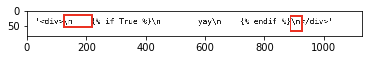

In [6]:
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

plt.imshow(Image.open(BytesIO(img_data)))
plt.axis()

# References
- [Python base64编码，转图片 - xqs42b - 博客园](https://www.cnblogs.com/xianqingsong/p/9965899.html)